In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

c:\users\user\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
97-123

'a'

In [11]:
def get_data(letter):
    web = requests.get(f'https://www.basketball-reference.com/players/{letter}/')
    content = web.content
    soup = BeautifulSoup(content,'html.parser')
    html = soup.find(name='table',attrs={"id":"players"})
    data = pd.read_html(str(html))[0]
    return data

In [21]:
data = pd.DataFrame()
for i in range(97,123):
    for_concat = get_data(chr(i))
    data = pd.concat([data,for_concat])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 19
Data columns (total 8 columns):
Player        4800 non-null object
From          4800 non-null object
To            4800 non-null object
Pos           4800 non-null object
Ht            4800 non-null object
Wt            4795 non-null float64
Birth Date    4780 non-null object
Colleges      4471 non-null object
dtypes: float64(1), object(7)
memory usage: 337.5+ KB


In [402]:
data[(data['From']==2004)&(data['To']==2020)]

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,ft,inch
114,Carmelo Anthony,2004,2020,F,6-8,240.0,"May 29, 1984",Syracuse,6,8
117,Udonis Haslem,2004,2020,F-C,6-8,235.0,"June 9, 1980",Florida,6,8
47,LeBron James,2004,2020,F-G,6-9,250.0,"December 30, 1984",NaN,6,9
131,Kyle Korver,2004,2020,G-F,6-7,212.0,"March 17, 1981",Creighton,6,7


In [26]:
pos_list = data['Pos'].values.tolist()

In [27]:
len(pos_list)

4800

In [28]:
c = Counter(pos_list)

In [29]:
c.most_common(10)

[('G', 1695),
 ('F', 1375),
 ('C', 517),
 ('F-C', 395),
 ('G-F', 376),
 ('C-F', 224),
 ('F-G', 218)]

In [32]:
data['From'] = data['From'].astype(int)

In [34]:
min(data['From'])

1947

In [35]:
over1980 = data[data['From']>=1980]

In [37]:
len(over1980)

2957

In [41]:
over_1980_list = over1980['Pos'].values.tolist()

In [78]:
c = Counter(over_1980_list)

In [79]:
 c.most_common(7)

[('G', 1096),
 ('F', 893),
 ('C', 362),
 ('F-C', 210),
 ('G-F', 203),
 ('C-F', 98),
 ('F-G', 95)]

In [146]:
362+98

460

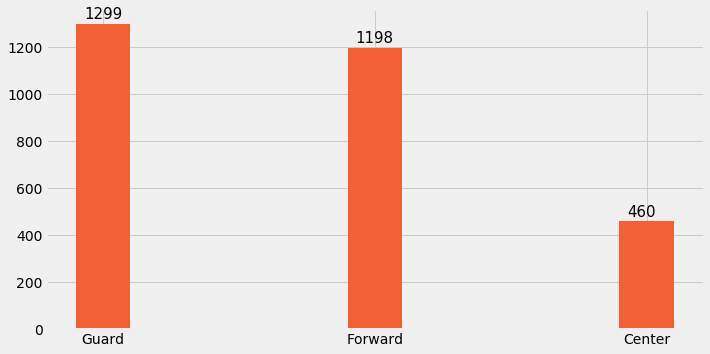

In [230]:
fig = plt.gcf()
fig.set_size_inches(10.5,5.5)
x=['Guard','Forward','Center']
y=[1299,1198,460]
plt.bar(x,y,color='#F46036', width=0.2)
plt.xticks(np.linspace(0, 2, 3))

a = -0.07
for msg in y:
    plt.text(a,msg+20,str(msg),fontsize = 15)
    a+=1

In [403]:
c = Counter(data['Pos'])

In [407]:
c

Counter({'F-C': 395,
         'C-F': 224,
         'C': 517,
         'G': 1695,
         'F': 1375,
         'G-F': 376,
         'F-G': 218})

In [320]:
207+420

627

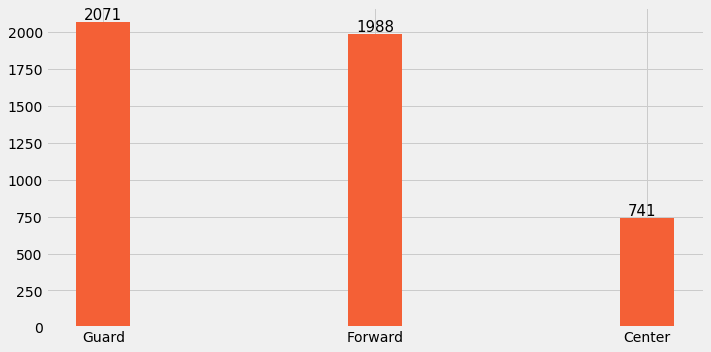

In [411]:
fig = plt.gcf()
fig.set_size_inches(10.5,5.5)
x=['Guard','Forward','Center']
a=(c['G']+c['G-F'])
b=(c['F']+c['F-C']+c['F-G'])
c=(c['C']+c['C-F'])
y=[a,b,c]
plt.bar(x,y,color='#F46036', width=0.2)
plt.xticks(np.linspace(0, 2, 3))

a = -0.07
for msg in y:
    plt.text(a,msg+20,str(msg),fontsize = 15)
    a+=1

In [729]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 19
Data columns (total 10 columns):
Player        4800 non-null object
From          4800 non-null int32
To            4800 non-null object
Pos           4800 non-null object
Ht            4800 non-null object
Wt            4795 non-null float64
Birth Date    4780 non-null object
Colleges      4471 non-null object
ft            4800 non-null int64
inch          4800 non-null int64
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 553.8+ KB


In [730]:
guard = []
forward = []
center = []
for y in range(1947,2021):
    this_yesr = data[data['From'] == y]
    g = len(this_yesr[(this_yesr['Pos'] == 'G')|(this_yesr['Pos'] == 'G-F')])
    f = len(this_yesr[(this_yesr['Pos'] == 'F')|(this_yesr['Pos'] == 'F-G')|(this_yesr['Pos'] == 'F-C')])
    c = len(this_yesr[(this_yesr['Pos'] == 'C')|(this_yesr['Pos'] == 'C-F')])
    guard.append(g)
    forward.append(f)
    center.append(c)

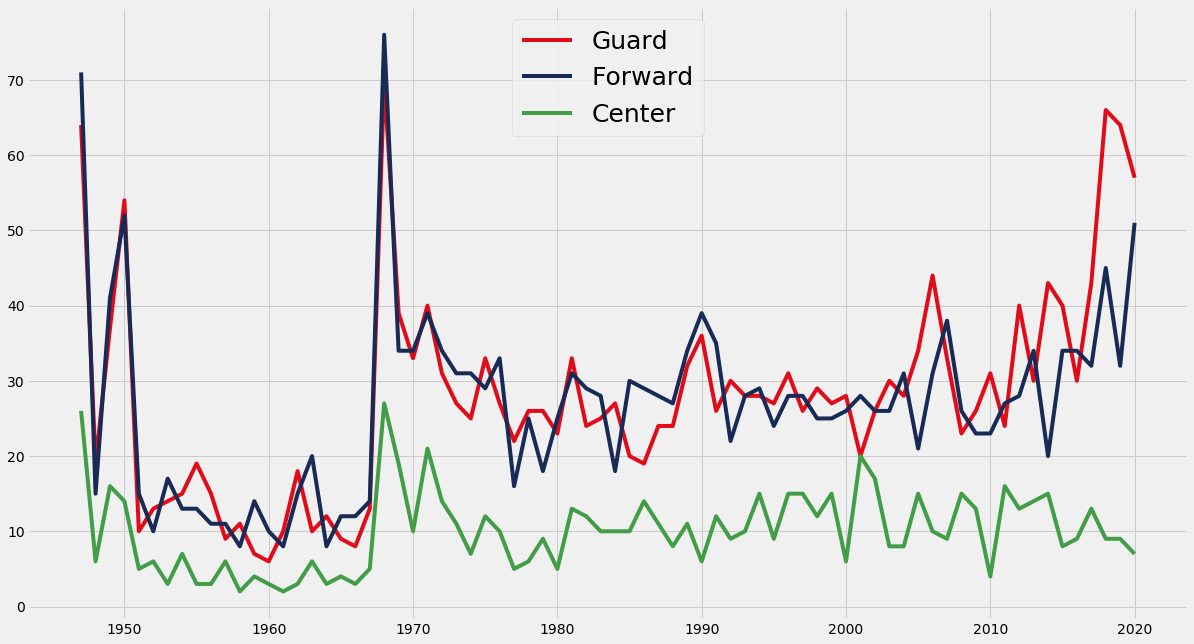

In [731]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
x = np.arange(1947,2021,1).tolist()
plt.plot(x,guard,color='#E20B19')
plt.plot(x,forward,color='#172B56')
plt.plot(x,center,color='#429E46')
plt.legend(['Guard','Forward','Center'],prop = {'size':25})

In [332]:
data2[data2['From']==2018]

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,ft,inch,High
24,Bam Adebayo,2018,2020,C-F,6-9,255.0,"July 18, 1997",Kentucky,6,9,205.74
57,Jarrett Allen,2018,2020,C-F,6-11,237.0,"April 21, 1998",Texas,6,11,210.82
59,Kadeem Allen,2018,2020,G,6-1,200.0,"January 15, 1993",Arizona,6,1,185.42
108,Ike Anigbogu,2018,2019,F-C,6-10,250.0,"October 17, 1998",UCLA,6,10,208.28
118,OG Anunoby,2018,2020,F,6-7,232.0,"July 17, 1997",Indiana,6,7,200.66
124,Ryan Arcidiacono,2018,2020,G,6-3,195.0,"March 26, 1994",Villanova,6,3,190.50
143,Jamel Artis,2018,2018,G-F,6-7,213.0,"January 12, 1993",Pitt,6,7,200.66
4,Dwayne Bacon,2018,2020,G,6-6,221.0,"August 30, 1995",Florida State,6,6,198.12
25,Lonzo Ball,2018,2020,G,6-6,190.0,"October 27, 1997",UCLA,6,6,198.12
123,Jordan Bell,2018,2020,F,6-8,216.0,"January 7, 1995",Oregon,6,8,203.20


In [47]:
for c in over1980.columns:
    try:
        over1980[c] = over1980[c].astype(int)
    except:
        pass

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [878]:
guard = []
forward = []
center = []
for y in range(1947,2021):
    this_yesr = data[data['From'] == y]
    g = len(this_yesr[(this_yesr['Pos'] == 'G')|(this_yesr['Pos'] == 'G-F')])//2
    f = len(this_yesr[(this_yesr['Pos'] == 'F')|(this_yesr['Pos'] == 'F-G')|(this_yesr['Pos'] == 'F-C')])//2
    c = len(this_yesr[(this_yesr['Pos'] == 'C')|(this_yesr['Pos'] == 'C-F')])
    guard.append(g)
    forward.append(f)
    center.append(c)

In [879]:
plt.style.use('fivethirtyeight')

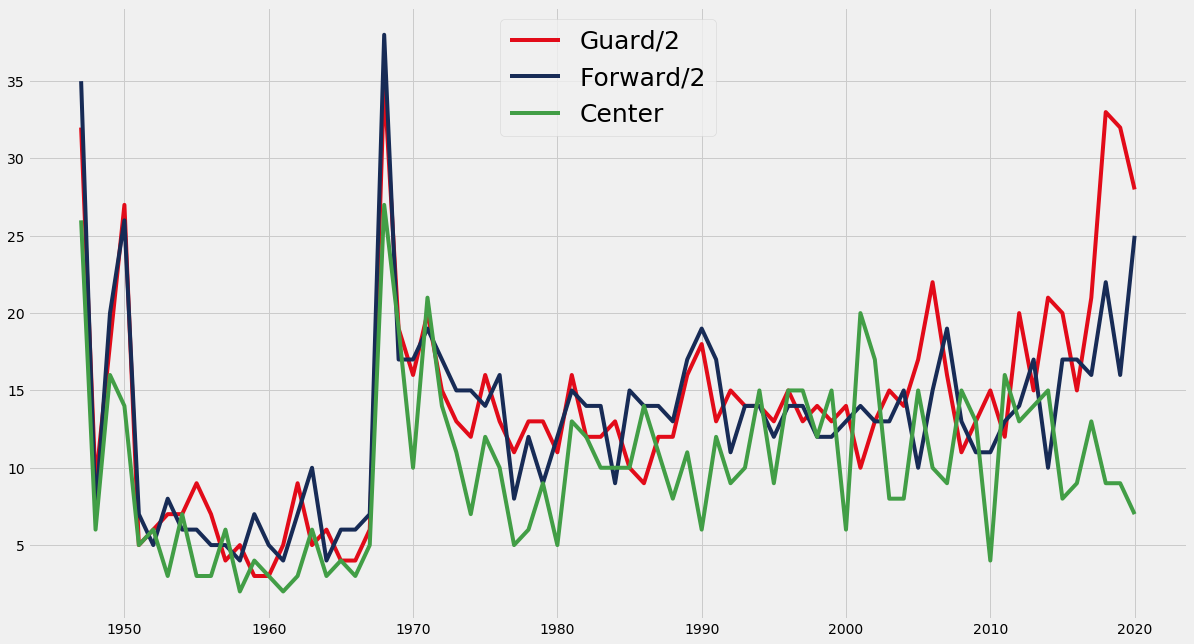

In [880]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
x = np.arange(1947,2021,1).tolist()
plt.plot(x,guard,color='#E20B19')
plt.plot(x,forward,color='#172B56')
plt.plot(x,center,color='#429E46')
plt.legend(['Guard/2','Forward/2','Center'],prop = {'size':25})



In [123]:
over1980[over1980['From']==2020]

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
51,Nickeil Alexander-Walker,2020,2020,G,6-5,205,"September 2, 1998",Virginia Tech
61,RJ Barrett,2020,2020,G-F,6-6,202,"June 14, 2000",Duke
97,Darius Bazley,2020,2020,F,6-8,208,"June 12, 2000",NaN
177,Goga Bitadze,2020,2020,C,6-11,245,"July 20, 1999",NaN
220,Marques Bolden,2020,2020,C,6-11,245,"April 17, 1998",Duke
227,Jordan Bone,2020,2020,G,6-3,179,"November 5, 1997",Tennessee
256,Brian Bowen,2020,2020,F,6-6,190,"October 2, 1998",NaN
264,Ky Bowman,2020,2020,G,6-1,181,"June 16, 1997",Boston College
299,Jarrell Brantley,2020,2020,F,6-5,250,"June 7, 1996",College of Charleston
303,Ignas Brazdeikis,2020,2020,F,6-6,216,"January 8, 1999",Michigan


In [242]:
over1980['ft']=over1980['Ht'].apply(lambda x:int(x.split('-')[0]))

over1980['inch']=over1980['Ht'].apply(lambda x:int(x.split('-')[1]))

over1980['High']=over1980['ft']*30.48+over1980['inch']*2.54

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [250]:
guard_high = []
forward_high = []
center_high = []
for y in range(1980,2021):
    this_yesr = over1980[over1980['From'] == y]
    g = this_yesr[(this_yesr['Pos'] == 'G')|(this_yesr['Pos'] == 'G-F')]['High'].mean()
    f = this_yesr[(this_yesr['Pos'] == 'F')|(this_yesr['Pos'] == 'F-G')|(this_yesr['Pos'] == 'F-C')]['High'].mean()
    c = this_yesr[(this_yesr['Pos'] == 'C')|(this_yesr['Pos'] == 'C-F')]['High'].mean()
    guard_high.append(g)
    forward_high.append(f)
    center_high.append(c)

In [253]:
center_high

[210.82000000000002,
 212.18769230769237,
 210.60833333333335,
 213.106,
 212.852,
 212.598,
 214.44857142857146,
 211.05090909090913,
 211.45499999999998,
 213.1290909090909,
 212.09,
 212.9366666666667,
 212.79555555555558,
 210.05800000000005,
 214.03733333333335,
 211.9488888888889,
 212.85200000000003,
 210.9893333333334,
 212.3016666666667,
 211.83600000000004,
 212.93666666666672,
 212.85200000000003,
 212.61294117647063,
 214.3125,
 213.04250000000002,
 213.86800000000002,
 213.10600000000005,
 211.66666666666666,
 211.66666666666669,
 213.36000000000007,
 213.36,
 211.77249999999998,
 209.45230769230773,
 210.45714285714288,
 212.0053333333334,
 212.40750000000003,
 215.33555555555554,
 212.38307692307697,
 208.5622222222222,
 209.97333333333333,
 214.81142857142862]

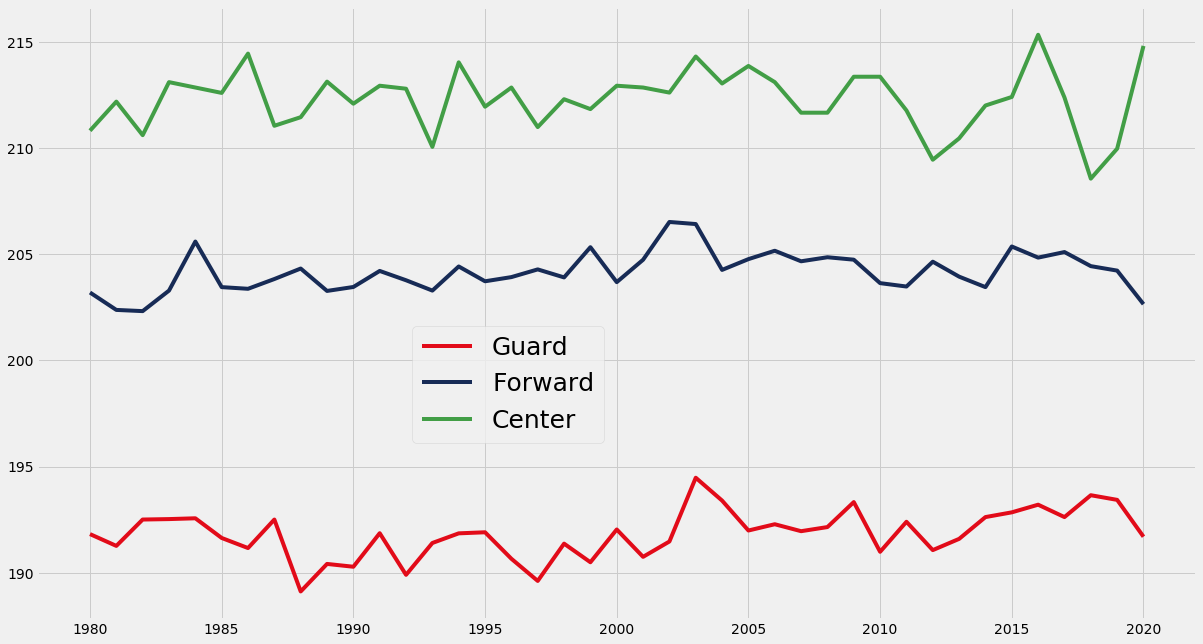

In [275]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
x = np.arange(1980,2021,1).tolist()
plt.plot(x,guard_high,color='#E20B19')
plt.plot(x,forward_high,color='#172B56')
plt.plot(x,center_high,color='#429E46')
plt.legend(['Guard','Forward','Center'],prop = {'size':25},loc='upper right',bbox_to_anchor=(0.5, 0.5))


In [288]:
data2['High']=data2['ft']*30.48+data2['inch']*2.54

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [290]:
test_guard_high = []
test_forward_high = []
test_center_high = []
for y in range(1947,2021):
    this_yesr = data2[data2['From'] == y]
    g = this_yesr[(this_yesr['Pos'] == 'G')|(this_yesr['Pos'] == 'G-F')]['High'].mean()
    f = this_yesr[(this_yesr['Pos'] == 'F')|(this_yesr['Pos'] == 'F-G')|(this_yesr['Pos'] == 'F-C')]['High'].mean()
    c = this_yesr[(this_yesr['Pos'] == 'C')|(this_yesr['Pos'] == 'C-F')]['High'].mean()
    test_guard_high.append(g)
    test_forward_high.append(f)
    test_center_high.append(c)

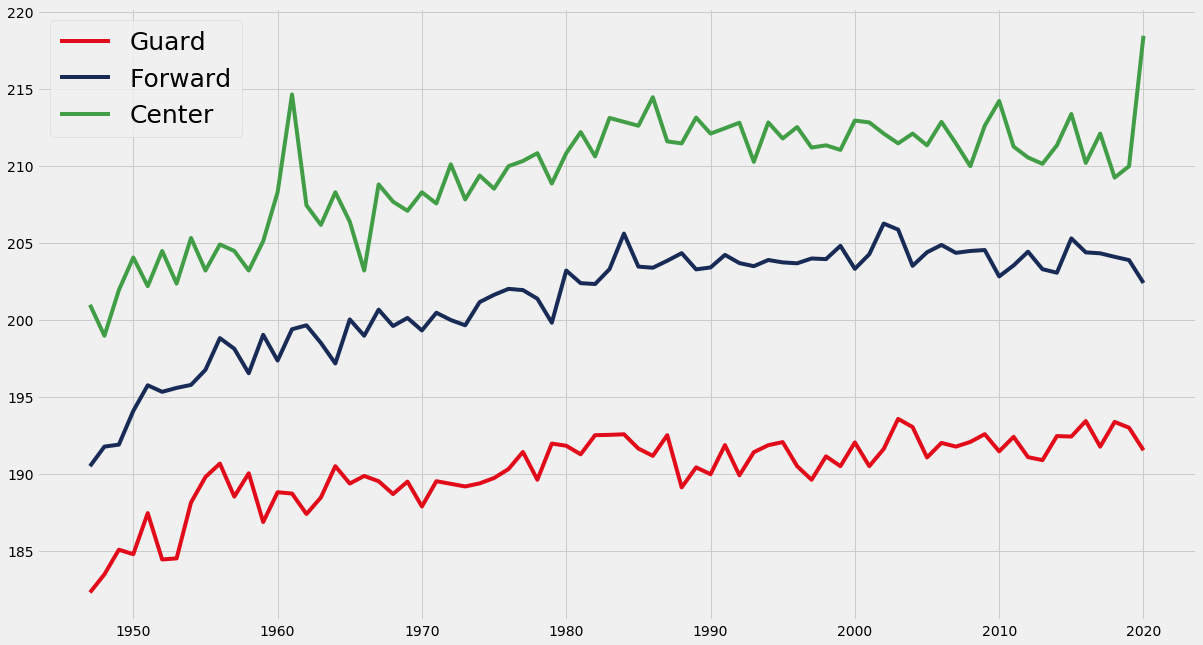

In [297]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
x = np.arange(1947,2021,1).tolist()
plt.plot(x,test_guard_high,color='#E20B19')
plt.plot(x,test_forward_high,color='#172B56')
plt.plot(x,test_center_high,color='#429E46')
plt.legend(['Guard','Forward','Center'],prop = {'size':25},loc=2)


In [303]:
data2[data2['From']==1961]

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,ft,inch,High
150,Al Attles*,1961,1971,G,6-0,175.0,"November 7, 1936",North Carolina A&T,6,0,182.88
241,Bob Boozer,1961,1971,F,6-8,215.0,"April 26, 1937",Kansas State,6,8,203.20
408,Dave Budd,1961,1965,F,6-6,205.0,"October 28, 1938",Wake Forest,6,6,198.12
62,Ralph Davis,1961,1962,G,6-4,180.0,"September 7, 1938",Cincinnati,6,4,193.04
16,Swede Halbrook,1961,1962,C,7-3,235.0,"January 30, 1933",Oregon State,7,3,220.98
7,Darrall Imhoff,1961,1972,C,6-10,220.0,"October 11, 1938",California,6,10,208.28
146,Ron Johnson,1961,1961,F,6-8,215.0,"July 20, 1938",Minnesota,6,8,203.20
160,Howie Jolliff,1961,1963,F-C,6-7,218.0,"July 20, 1938",Ohio University,6,7,200.66
214,Willie Jones,1961,1965,G,6-3,185.0,"June 29, 1936",Northwestern,6,3,190.50
42,Pickles Kennedy,1961,1961,G,5-11,180.0,"May 17, 1938",Temple,5,11,180.34


In [310]:
average_high = []
for y in range(1947,2021):
    mean_high = data2[data2['From']==y]['High'].mean()
    average_high.append(mean_high)

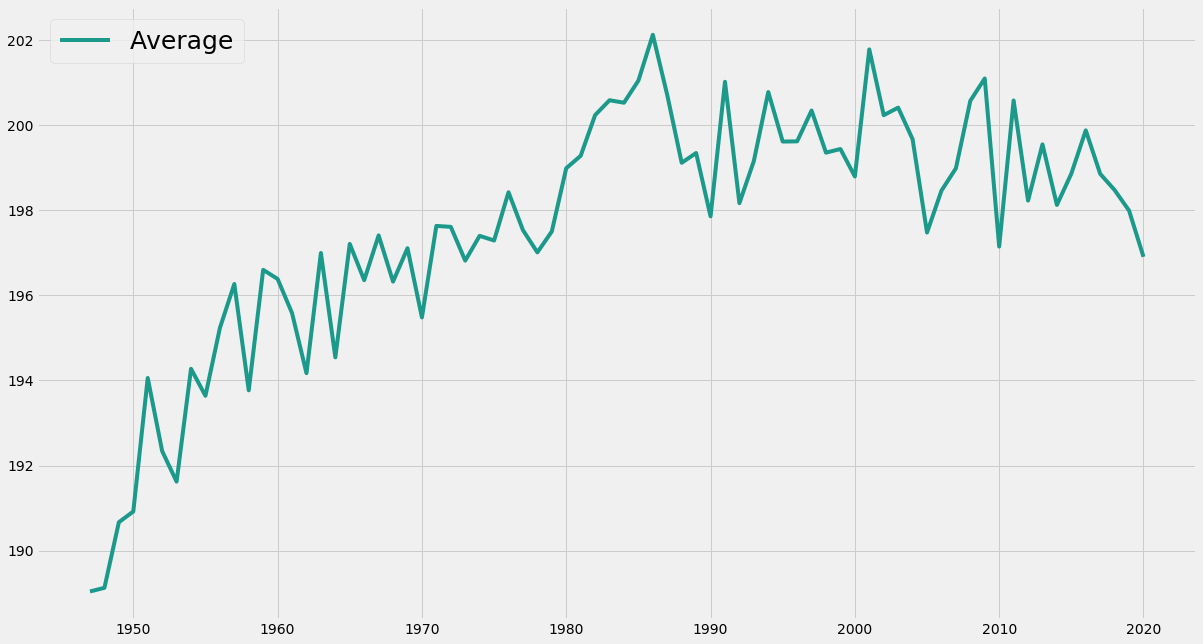

In [312]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
x = np.arange(1947,2021,1).tolist()
plt.plot(x,average_high,color='#1B998B')

plt.legend(['Average'],prop = {'size':25},loc=2)

In [313]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4448 entries, 0 to 19
Data columns (total 11 columns):
Player        4448 non-null object
From          4448 non-null int32
To            4448 non-null object
Pos           4448 non-null object
Ht            4448 non-null object
Wt            4448 non-null float64
Birth Date    4448 non-null object
Colleges      4448 non-null object
ft            4448 non-null int64
inch          4448 non-null int64
High          4448 non-null float64
dtypes: float64(2), int32(1), int64(2), object(6)
memory usage: 559.6+ KB


In [307]:
data2[data2['High']==data2['High'].max()]

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,ft,inch,High
218,Manute Bol,1986,1995,C,7-7,200.0,"October 16, 1962",University of Bridgeport,7,7,231.14


In [334]:
data2[data2['Player']=='Ben Simmons']

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,ft,inch,High
167,Ben Simmons,2018,2020,G-F,6-10,230.0,"July 20, 1996",LSU,6,10,208.28


In [338]:
for y in range(1947,2021):
    print(y,len(data2[data2['From']==y]))

1947 148
1948 37
1949 91
1950 115
1951 30
1952 29
1953 34
1954 33
1955 34
1956 29
1957 26
1958 21
1959 25
1960 19
1961 20
1962 36
1963 36
1964 22
1965 25
1966 23
1967 32
1968 158
1969 90
1970 75
1971 98
1972 79
1973 68
1974 63
1975 73
1976 68
1977 43
1978 57
1979 53
1980 53
1981 77
1982 65
1983 63
1984 55
1985 60
1986 61
1987 62
1988 59
1989 77
1990 76
1991 72
1992 60
1993 64
1994 68
1995 58
1996 68
1997 63
1998 62
1999 58
2000 57
2001 57
2002 53
2003 50
2004 51
2005 47
2006 68
2007 65
2008 54
2009 53
2010 52
2011 59
2012 75
2013 66
2014 67
2015 69
2016 58
2017 73
2018 109
2019 96
2020 98


In [343]:
Counter(data2[data2['From']==2020]['Pos'].values.tolist())

Counter({'G': 47, 'G-F': 7, 'C': 3, 'F': 40, 'F-C': 1})

In [354]:
len(data2[data2['To']==1947])

79

In [355]:
79/148

0.5337837837837838

In [356]:
from selenium import webdriver

In [616]:
driver = webdriver.Chrome()
driver.get('https://www.basketball-reference.com/awards/mvp.html')
source = driver.page_source
driver.close()

In [617]:
soup = BeautifulSoup(source,'html.parser')

In [618]:
html = soup.find(name='table',attrs={'id':"mvp_NBA"})

In [619]:
MVP_data = pd.read_html(str(html))[0]

In [620]:
col='Season	Lg	Player	Voting	Age	Tm	G	MP	PTS	TRB	AST	STL	BLK	FG%	3P%	FT%	WS	WS/48'

In [621]:
col_list = col.split('\t')

In [724]:
MVP_data.columns=col_list

ValueError: Length mismatch: Expected axis has 3 elements, new values have 18 elements

In [624]:
MVP_data = MVP_data.loc[:,['Season','Player']]

In [626]:
pd.options.display.max_rows=50000

In [727]:
MVP_data.columns=['Season','Player','Pos']

In [728]:
MVP_data['Player']

63               Bob Pettit
62                Bob Cousy
61             Bill Russell
60               Bob Pettit
59         Wilt Chamberlain
58             Bill Russell
57             Bill Russell
56             Bill Russell
55          Oscar Robertson
54             Bill Russell
53         Wilt Chamberlain
52         Wilt Chamberlain
51         Wilt Chamberlain
50               Wes Unseld
49              Willis Reed
48      Kareem Abdul-Jabbar
47      Kareem Abdul-Jabbar
46              Dave Cowens
45      Kareem Abdul-Jabbar
44               Bob McAdoo
43      Kareem Abdul-Jabbar
42      Kareem Abdul-Jabbar
41              Bill Walton
40             Moses Malone
39      Kareem Abdul-Jabbar
38            Julius Erving
37             Moses Malone
36             Moses Malone
35               Larry Bird
34               Larry Bird
33               Larry Bird
32            Magic Johnson
31           Michael Jordan
30            Magic Johnson
29            Magic Johnson
28           Michael

In [628]:
for i in [20,21,42,43]:
    MVP_data = MVP_data.drop(index=i)

In [631]:
MVP_data = MVP_data.reset_index()

In [632]:
MVP_data = MVP_data.loc[:,['Season','Player']]

In [633]:
MVP_data

,Season,Player
0,2018-19,Giannis Antetokounmpo
1,2017-18,James Harden
2,2016-17,Russell Westbrook
3,2015-16,Stephen Curry
4,2014-15,Stephen Curry
5,2013-14,Kevin Durant
6,2012-13,LeBron James
7,2011-12,LeBron James
8,2010-11,Derrick Rose
9,2009-10,LeBron James


In [418]:
data['Player'] = data['Player'].apply(lambda x : x.replace('*',''))

In [611]:
def find_pos(player):
    try:
        pos = data[data['Player']==player]['Pos'].values.tolist()[0]
        if pos == 'G-F':
            pos = 'G'
        if pos == 'F-G' or pos == 'F-C':
            pos = 'F'
        if pos == 'C-F':
            pos = 'C'
        return pos
    except:
        pass

In [634]:
pos=[]
for p in MVP_data.iloc[:,1]:
    pos.append(find_pos(p))
Pos_series = pd.Series(pos)

In [635]:
MVP_data['Pos']=Pos_series

In [449]:
def find_year(player):
    try:
        year = data[data['Player']==player]['From'].values.tolist()[0]
        return year
    except:
        pass

In [450]:
MVP_data['YEAR'] = MVP_data['Player'].apply(lambda x:find_year(x))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [640]:
MVP_data = MVP_data[::-1]

In [641]:
MVP_data

,Season,Player,Pos
63,1955-56,Bob Pettit,F
62,1956-57,Bob Cousy,G
61,1957-58,Bill Russell,C
60,1958-59,Bob Pettit,F
59,1959-60,Wilt Chamberlain,C
58,1960-61,Bill Russell,C
57,1961-62,Bill Russell,C
56,1962-63,Bill Russell,C
55,1963-64,Oscar Robertson,G
54,1964-65,Bill Russell,C


In [652]:
pos_color=[]
for p in MVP_data.iloc[:,2]:
    if p =='G':
        pos_color.append('#3E5C76')
    elif p == 'F':
        pos_color.append('#1D2D44')
    elif p == 'C':
        pos_color.append('#ECA72C')
        


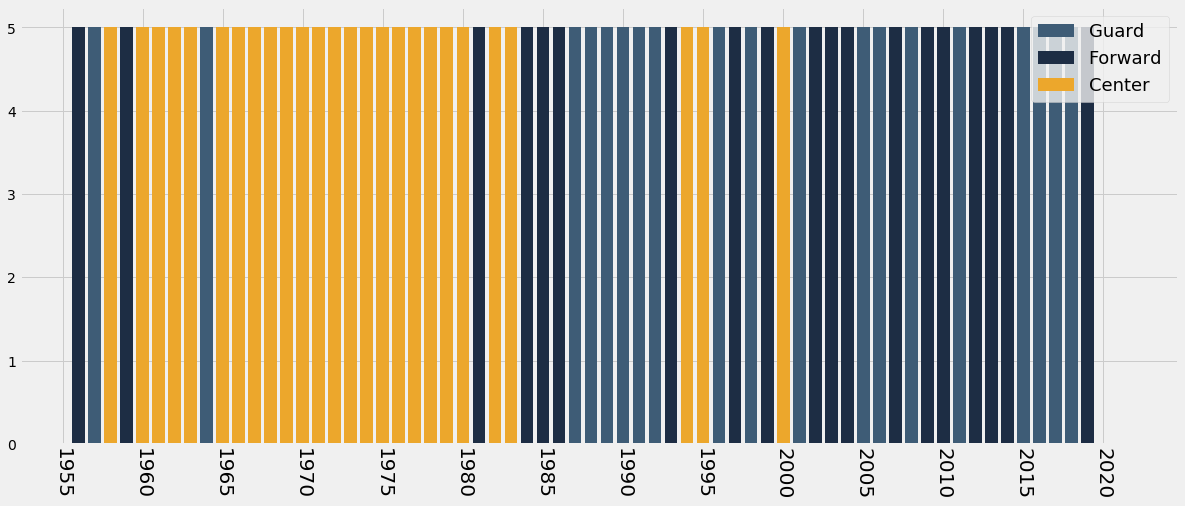

In [699]:
fig = plt.gcf()
fig.set_size_inches(18.5,7.5)
plt.bar(np.arange(1956,2020,1),5,color=pos_color)
plt.xticks(np.arange(1955,2021,5),fontsize=20,rotation=270)

custom_lines =[plt.bar(2021,0,color='#3E5C76'),
plt.bar(2021,0,color='#1D2D44'),
plt.bar(2021,0,color='#ECA72C')]

plt.legend(custom_lines,['Guard','Forward','Center'],prop={'size':18})

In [718]:
MVP_data.columns

MultiIndex(levels=[['3P%', 'AST', 'Age', 'BLK', 'FG%', 'FT%', 'G', 'Lg', 'MP', 'PTS', 'Player', 'STL', 'Season', 'TRB', 'Tm', 'Voting', 'WS', 'WS/48', 'index', 'Pos']],
           codes=[[12, 10, 19]])

In [723]:
MVP_data.columns=['3P%', 'AST', 'Age', 'BLK', 'FG%', 'FT%', 'G', 'Lg', 'MP', 'PTS', 'Player', 'STL', 'Season', 'TRB', 'Tm', 'Voting', 'WS', 'WS/48', 'index', 'Pos']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 20 elements

In [717]:
type(MVP_data['Player'])

pandas.core.frame.DataFrame

In [713]:
type(data)

pandas.core.frame.DataFrame

In [704]:
count = Counter(MVP_data['Pos'])

In [433]:
count

Counter({'C': 8, 'G-F': 4, 'F-G': 5, 'F': 4, 'C-F': 6, 'G': 7, 'F-C': 7})

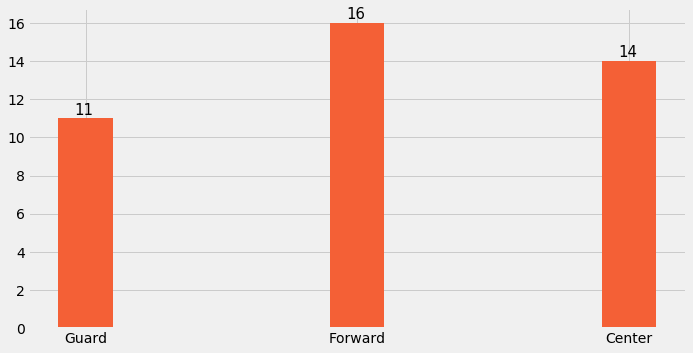

In [447]:
fig = plt.gcf()
fig.set_size_inches(10.5,5.5)
x=['Guard','Forward','Center']
a=(count['G']+count['G-F'])
b=(count['F']+count['F-C']+count['F-G'])
c=(count['C']+count['C-F'])
y=[a,b,c]
plt.bar(x,y,color='#F46036', width=0.2)
plt.xticks(np.linspace(0, 2, 3))

a = -0.04
for msg in y:
    plt.text(a,msg+0.2,str(msg),fontsize = 15)
    a+=1

In [732]:
fined = pd.read_csv('fined.csv')

In [734]:
fined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 6 columns):
Date            1321 non-null object
Team            1321 non-null object
Acquired        0 non-null float64
Relinquished    1321 non-null object
Notes           1321 non-null object
Money           1321 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 62.0+ KB


In [736]:
from fuzzywuzzy import fuzz

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [737]:
fuzz.ratio('abc','abcd')

86

In [744]:
data[data['Player']=='Kareem Abdul-Jabbar']['Pos'].values.tolist()[0]

'C'

In [749]:
player_pos={}
for p in fined['Relinquished']:
    for p2 in data['Player']:
        if fuzz.ratio(p,p2)>=80:
            pos = data[data['Player']==p2]['Pos'].values.tolist()[0]
            player_pos[p]=pos

In [760]:
def set_pos(player):
    try:
        pos = player_pos[player]
        if len(pos)>1:
            pos=pos[0]
        return pos
    except KeyError:
        return 'N'

In [761]:
fined['Pos'] = fined['Relinquished'].apply(lambda x:set_pos(x))

In [762]:
fined

,Date,Team,Acquired,Relinquished,Notes,Money,Pos
0,1948-12-22,Nationals (NBL),NaN,Al Cervi,fined as head coach $50 for running onto the c...,50,G
1,1954-02-02,Nationals,NaN,Bill Gabor / Billy Gabor,fined $50 by NBA for verbally abusing official...,50,N
2,1954-02-02,Nationals,NaN,Paul Seymour,fined $50 by NBA for making contact with official,50,G
3,1954-02-20,Hawks,NaN,Bill Tosheff,fined $50 by NBA for drawing two technical fou...,50,G
4,1958-01-24,Knicks,NaN,Vince Boryla,fined as head coach $325 for arguing with referee,325,F
5,1960-02-16,Nationals,NaN,Paul Seymour,fined as head coach $150 for confronting refer...,150,G
6,1960-06-07,Hawks,NaN,Paul Seymour,"fined as head coach $150 by NBA for ""unbecomin...",150,G
7,1962-01-25,Nationals,NaN,Alex Hannum,fined $150 by NBA for leaving bench during alt...,150,F
8,1964-01-25,Knicks,NaN,Bill McGill / Billy McGill,fined $50,50,N
9,1964-01-25,Knicks,NaN,Tom Hoover,fined $50,50,C


In [765]:
fined[fined['Pos']=='G']['Money'].mean()

17464.48256880734

In [766]:
fined[fined['Pos']=='F']['Money'].mean()

15051.146993318485

In [777]:
fine2010 = fined[fined['Date']>'2010-10-30']

In [786]:
fine2010 = fine2010[fine2010['Notes'].str.startswith('fined')]

In [788]:
fine2010[fine2010['Pos']=='F']['Money'].mean()

21353.846153846152

In [789]:
fine2010[fine2010['Pos']=='G']['Money'].mean()

21089.74358974359

In [790]:
fine2010[fine2010['Pos']=='C']['Money'].mean()

24069.767441860466

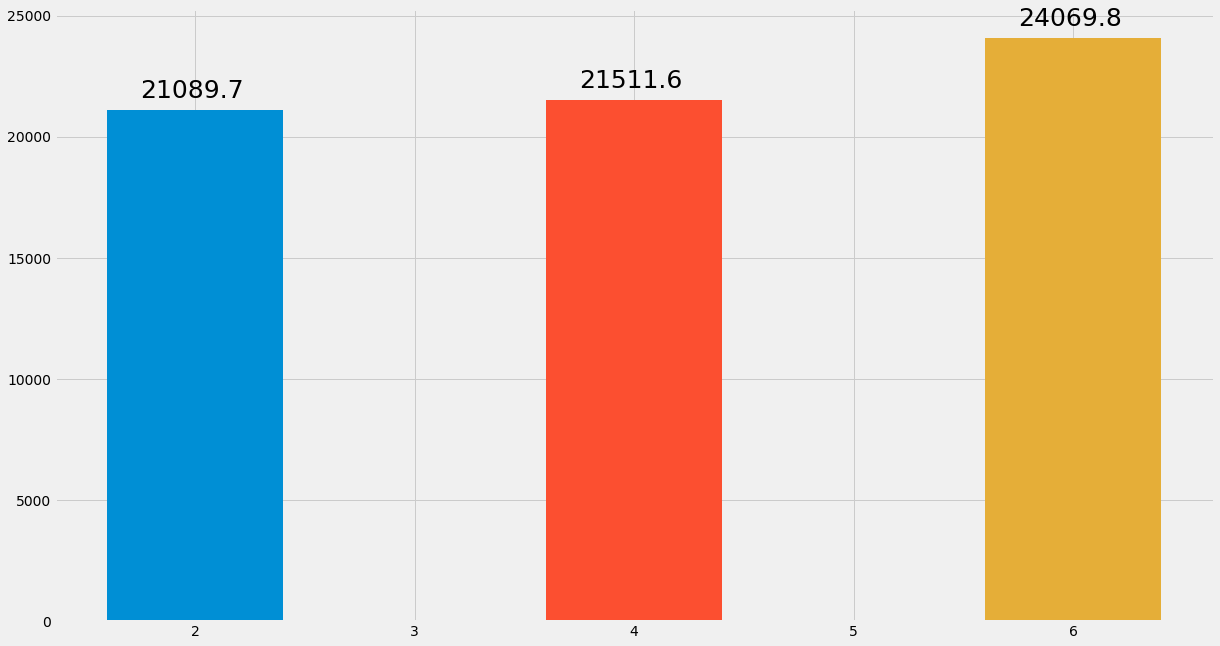

In [824]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
width = 2
plt.bar(width,fine2010[fine2010['Pos']=='G']['Money'].mean())
plt.bar(width*2,fine2010[fine2010['Pos']=='F']['Money'].mean())
plt.bar(width*3,fine2010[fine2010['Pos']=='C']['Money'].mean())

start = 1.75
for a in ['G','F','C']:
    plt.text(start,fine2010[fine2010['Pos']==a]['Money'].mean()+500,str(round(fine2010[fine2010['Pos']==a]['Money'].mean(),1)),fontsize=25)
    start+=2

In [823]:
fine2010 = fine2010[fine2010['Money']>1000]

In [830]:
len(fine2010[fine2010['Pos']=='G'])

156

In [831]:
len(fine2010[fine2010['Pos']=='F'])

129

In [832]:
len(fine2010[fine2010['Pos']=='C'])

43

In [842]:
fined[(fined['Date']>'2018-09-10')&(fined['Date']<'2019-09-10')]

,Date,Team,Acquired,Relinquished,Notes,Money,Pos
1250,2018-10-08,Cavaliers,NaN,J.R. Smith,fined $15000 by NBA for altercation with oppos...,15000,G
1251,2018-10-08,Celtics,NaN,Marcus Smart,fined $25000 by NBA for escalating altercation...,25000,G
1252,2018-10-21,Lakers,NaN,Brandon Ingram,suspended by NBA for 4 games (forfeited $15881...,158817,F
1253,2018-10-21,Lakers,NaN,Rajon Rondo,suspended by NBA for 3 games (forfeited $18620...,186207,G
1254,2018-10-21,Rockets,NaN,Chris Paul,suspended by NBA for 2 games (forfeited $49178...,491781,G
1255,2018-10-24,Lakers,NaN,Luke Walton,fined as head coach $15000 by NBA,15000,F
1256,2018-10-24,Wizards,NaN,Markieff Morris,fined $15000 by NBA,15000,F
1257,2018-11-06,Celtics,NaN,Kyrie Irving,fined $25000 by NBA for throwing ball into sta...,25000,G
1258,2018-11-07,Nuggets,NaN,Nikola Jokic,fined $25000 by NBA for using derogatory and o...,25000,C
1259,2018-11-19,Heat,NaN,Josh Richardson,fined $25000 by NBA for throwing shoes into st...,25000,G


In [846]:
len(fined[fined['Pos']=='F'])

449

In [849]:
data['To']=data['To'].astype('int')

In [850]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 19
Data columns (total 10 columns):
Player        4800 non-null object
From          4800 non-null int32
To            4800 non-null int32
Pos           4800 non-null object
Ht            4800 non-null object
Wt            4795 non-null float64
Birth Date    4780 non-null object
Colleges      4471 non-null object
ft            4800 non-null int64
inch          4800 non-null int64
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 535.0+ KB


In [852]:
data['During'] = data['To']-data['From']+1

In [856]:
data[(data['Pos']=='G')|(data['Pos']=='G-F')]['During'].mean()

4.998551424432641

In [857]:
data[(data['Pos']=='F')|(data['Pos']=='F-G')|(data['Pos']=='F-C')]['During'].mean()

5.129275653923541

In [858]:
data[(data['Pos']=='C')|(data['Pos']=='C-F')]['During'].mean()

5.778677462887989

In [859]:
data['During'].max()

23

In [870]:
data[data['Pos']=='C'].sort_values('During',ascending=False)

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,ft,inch,During
21,Robert Parish,1977,1997,C,7-1,230.0,"August 30, 1953",Centenary College of Louisiana,7,1,21
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947",UCLA,7,2,20
92,Tyson Chandler,2002,2020,C,7-0,240.0,"October 2, 1982",NaN,7,0,19
19,Shaquille O'Neal,1993,2011,C,7-1,325.0,"March 6, 1972",LSU,7,1,19
191,Tree Rollins,1978,1995,C,7-1,235.0,"June 16, 1955",Clemson,7,1,18
340,Nazr Mohammed,1999,2016,C,6-10,221.0,"September 5, 1977",Kentucky,6,10,18
447,Dikembe Mutombo,1992,2009,C,7-2,245.0,"June 25, 1966",Georgetown,7,2,18
44,Hakeem Olajuwon,1985,2002,C,7-0,255.0,"January 21, 1963",Houston,7,0,18
92,Artis Gilmore,1972,1988,C,7-2,240.0,"September 21, 1949","Gardner-Webb University, Jacksonville University",7,2,17
154,Vlade Divac,1990,2005,C,7-1,243.0,"February 3, 1968",NaN,7,1,16


In [888]:
data[data['From']==2018]

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,ft,inch,During
24,Bam Adebayo,2018,2020,C-F,6-9,255.0,"July 18, 1997",Kentucky,6,9,3
57,Jarrett Allen,2018,2020,C-F,6-11,237.0,"April 21, 1998",Texas,6,11,3
59,Kadeem Allen,2018,2020,G,6-1,200.0,"January 15, 1993",Arizona,6,1,3
108,Ike Anigbogu,2018,2019,F-C,6-10,250.0,"October 17, 1998",UCLA,6,10,2
118,OG Anunoby,2018,2020,F,6-7,232.0,"July 17, 1997",Indiana,6,7,3
124,Ryan Arcidiacono,2018,2020,G,6-3,195.0,"March 26, 1994",Villanova,6,3,3
143,Jamel Artis,2018,2018,G-F,6-7,213.0,"January 12, 1993",Pitt,6,7,1
4,Dwayne Bacon,2018,2020,G,6-6,221.0,"August 30, 1995",Florida State,6,6,3
25,Lonzo Ball,2018,2020,G,6-6,190.0,"October 27, 1997",UCLA,6,6,3
123,Jordan Bell,2018,2020,F,6-8,216.0,"January 7, 1995",Oregon,6,8,3


In [889]:
data['High']=data['ft']*30.48+data['inch']*2.54

In [891]:
data[(data['Pos']=='G')|(data['Pos']=='G-F')]['High'].mean()

190.41292129406082

In [892]:
data[(data['Pos']=='F')|(data['Pos']=='F-G')|(data['Pos']=='F-C')]['High'].mean()

201.61569416498992

In [893]:
data[(data['Pos']=='C')|(data['Pos']=='C-F')]['High'].mean()

209.98704453441297

In [895]:
data[(data['Pos']=='C')&(data['From']==1961)]

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,ft,inch,During,High
16,Swede Halbrook,1961,1962,C,7-3,235.0,"January 30, 1933",Oregon State,7,3,2,220.98
7,Darrall Imhoff,1961,1972,C,6-10,220.0,"October 11, 1938",California,6,10,12,208.28


In [899]:
len(data[(data['Pos']=='G-F')|(data['Pos']=='F-G')])

594